# 6. HouseAge Analysis (TPE)   
6-1. HouseAge Data Exploration     
----Feature 1. TransactionYear   
----Feature 2. Type   
----Feature 3. District   
----Feature 4. District x Type   
6-2. 用眾數補值 CompletionYear   
6-3. 用 'CompletionYear' 補值 'HouseAge'   

In [1]:
#載入套件
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import missingno as msno
import math

#匯入自己寫的程式
import dataframe_format as ff
import human_read_data as hr
import plot_analysis as pa

In [2]:
df = pd.read_csv('df_train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119440 entries, 0 to 119439
Data columns (total 42 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Identifier          119440 non-null  object 
 1   Num_Land            119440 non-null  int64  
 2   Num_Building        119440 non-null  int64  
 3   Num_ParkingSpace    119440 non-null  int64  
 4   Storeys             119440 non-null  float64
 5   Floor_Arabic        119440 non-null  float64
 6   Num_Floors          119440 non-null  float64
 7   HouseAge            110188 non-null  float64
 8   CompletionDate_AD   110188 non-null  float64
 9   TransactionDate_AD  119440 non-null  int64  
 10  Bedrooms            119440 non-null  int64  
 11  LivingRooms         119440 non-null  int64  
 12  Bathrooms           119440 non-null  int64  
 13  TotalArea           119440 non-null  float64
 14  LandArea            119440 non-null  float64
 15  PrimaryArea         119440 non-nul

# 6_1. HouseAge Data Exploration
觀察與屋齡相關的特徵

In [3]:
# 缺失值數量
print(f"總筆數: {len(df)}")
missing_values = df.isna().sum()
percentage = 100 * (len(df)-df['HouseAge'].count())/len(df)
print("HouseAge Missing value percentage (%): {:.1f}".format(percentage))

總筆數: 119440
HouseAge Missing value percentage (%): 7.7


In [4]:
#查看各欄位缺失植數量
print('-----missing_values-----')
missing_value_true = missing_values[missing_values > 1]
print(missing_value_true)

-----missing_values-----
HouseAge             9252
CompletionDate_AD    9252
dtype: int64


In [5]:
# 將日期轉換成 '...Year' & '...Month'欄位
df = hr.process_month_year(df)

In [6]:
df.to_csv('transaction_year.csv', encoding='utf-8-sig', index=False)

(a) 將數值欄位另外存取為 'df_num'

In [7]:
#df = pd.read_csv('transaction_year.csv')

In [8]:
# 將數值欄位另外存取為 'df_num'
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,AuxiliaryArea,BalconyArea,Bathrooms,Bedrooms,CompletionDate_AD,CompletionYear,Floor_Arabic,Hospital_Dist,HouseAge,LandArea,...,PrimaryArea,Primary_Dist,Railway_Dist,Sec_Dist,Storeys,TotalArea,TotalPrice,TransactionDate_AD,TransactionMonth,TransactionYear
0,0.00,5.08,2,3,198309.0,1983.0,2.0,986.810123,31.0,31.50,...,85.28,434.611897,5518.296523,232.583754,5.0,98.62,11300000,201405,5,2014
1,1.30,4.61,1,1,201009.0,2010.0,10.0,1252.993661,9.0,3.68,...,31.47,289.361797,1646.111526,265.468281,18.0,56.04,15930000,201910,10,2019
2,1.04,5.77,1,2,201804.0,2018.0,13.0,828.428002,-2.0,8.32,...,36.78,332.255267,2511.303778,141.307329,14.0,103.71,33000000,201601,1,2016
3,11.56,0.00,2,3,197705.0,1977.0,1.0,1075.894739,38.0,35.32,...,84.88,137.567134,6311.609820,240.123920,4.0,96.44,13000000,201504,4,2015
4,20.06,16.14,0,0,201801.0,2018.0,6.0,2020.580964,0.0,64.99,...,120.26,432.853701,7063.465463,376.047718,12.0,293.82,55500000,201804,4,2018


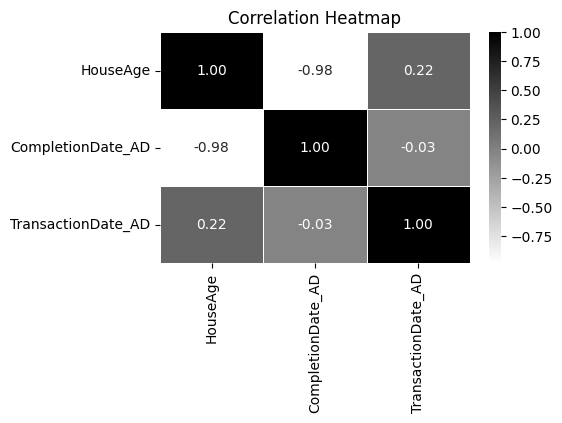

In [9]:
# 查看相關係數
df_area = df[['HouseAge','CompletionDate_AD','TransactionDate_AD']]

# Calculate the correlation coefficient matrix
corr_matrix = df_area.corr()

# creat a heat map with the mask
plt.figure(figsize=(5, 3))
sns.heatmap(corr_matrix, annot=True, cmap='gray_r', fmt=".2f", linewidths=.5)

plt.title('Correlation Heatmap')
plt.show()

(b) 建立無空值的'df_nonull'

In [10]:
# 建立無 NAN (HouseAge/ CompletionDate_AD)的 DataFrame
df_nonull = df.dropna(subset=['HouseAge'])
df_nonull = df_nonull.astype({'HouseAge': 'int64', 'CompletionYear': 'int64', 'TransactionYear': 'int64'})

count    110188.000000
mean         19.990344
std          16.588874
min          -7.000000
25%           4.000000
50%          19.000000
75%          35.000000
max          94.000000
Name: HouseAge, dtype: float64
110188


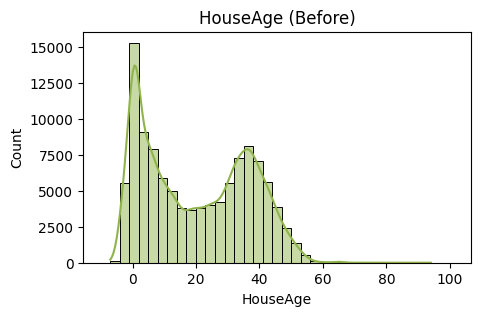

In [11]:
# 查看HouseAge資料分布情況
print(df_nonull['HouseAge'].describe())
print(len(df_nonull['HouseAge']))
plt.figure(figsize=(5, 3))
plt.title('HouseAge (Before)')
sns.histplot(df_nonull['HouseAge'], color='#90B44B', bins=range(-10,103,3), kde=True)
plt.show()

count    110188.000000
mean       1997.448043
std          16.182181
min        1923.000000
25%        1983.000000
50%        1998.000000
75%        2013.000000
max        2023.000000
Name: CompletionYear, dtype: float64
110188


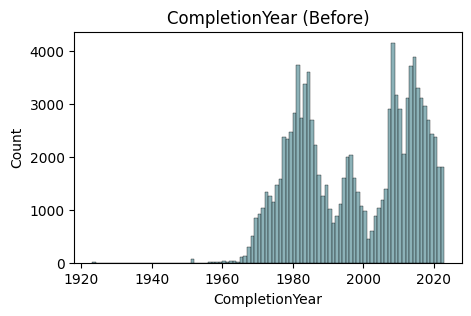

In [12]:
# 查看CompletionYear資料分布情況
print(df_nonull['CompletionYear'].describe())
print(len(df_nonull['CompletionYear']))
plt.figure(figsize=(5, 3))
plt.title('CompletionYear (Before)')
sns.histplot(df_nonull['CompletionYear'], color='#6699A1', bins=12, binwidth=1)
plt.show()

count    110188.000000
mean       2017.434884
std           3.177343
min        2012.000000
25%        2014.000000
50%        2018.000000
75%        2020.000000
max        2023.000000
Name: TransactionYear, dtype: float64
110188


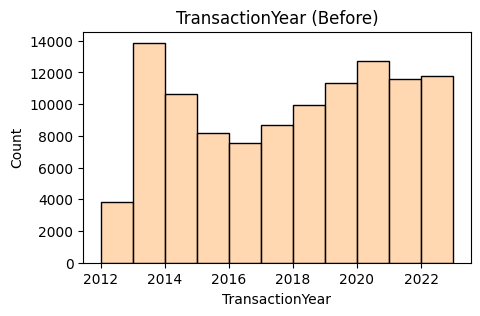

In [13]:
# 查看TransactionYear資料分布情況
print(df_nonull['TransactionYear'].describe())
print(len(df_nonull['TransactionYear']))
plt.figure(figsize=(5, 3))
plt.title('TransactionYear (Before)')
sns.histplot(df_nonull['TransactionYear'], color='#ffcc99', bins='auto', binwidth=1)
plt.show()

# Feature 1. TransactionYear

Missing value percentage (%): 7.7
      Missing_Count  Total_Count  Missing_Percentage
2014           1005       176145            0.570553
2019           1174       222090            0.528615
2016            710       135299            0.524764
2015            840       157254            0.534168
2018           1121       188090            0.595991
2021            636       285197            0.223004
2020            923       272230            0.339052
2017            883       159803            0.552555
2022            293       251550            0.116478
2013           1322       226406            0.583907
2023             48        81195            0.059117
2012            297        47437            0.626094


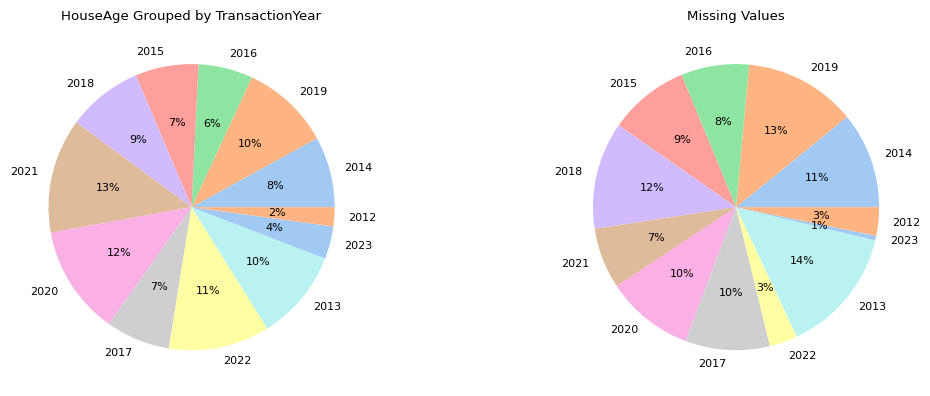

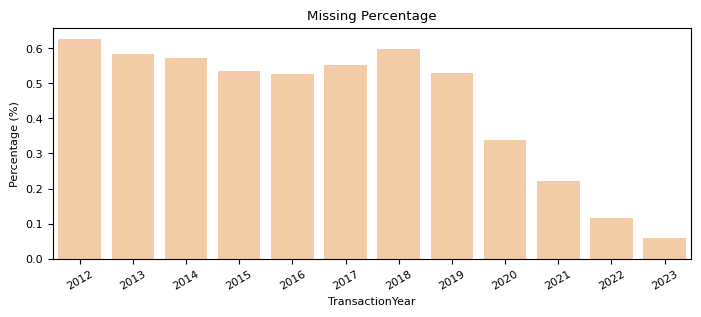

In [14]:
target_column = 'HouseAge'
gorup_column = 'TransactionYear'
data_all = pa.draw_pie_groupby(df, target_column, gorup_column, 1)

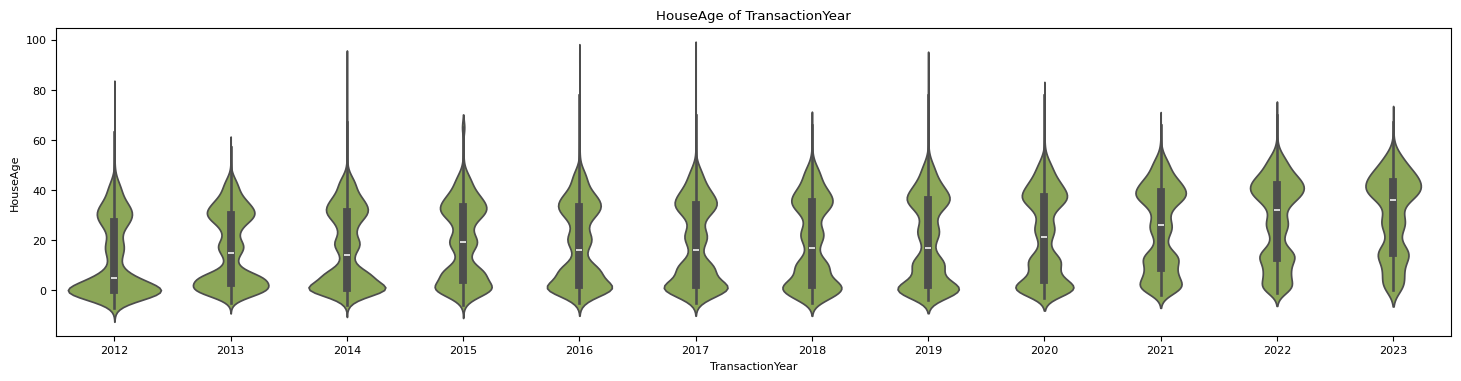

In [15]:
# 只存取數值欄位
df_type = df_nonull.select_dtypes(include = ['float64', 'int64'])
df_type['District'] = df_nonull['District']
df_type['Type'] = df_nonull['Type']

plt.figure(figsize=(18,4))
sns.violinplot(data=df_type,x='TransactionYear',y='HouseAge', color='#90B44B')
plt.title('HouseAge of TransactionYear')
plt.show()

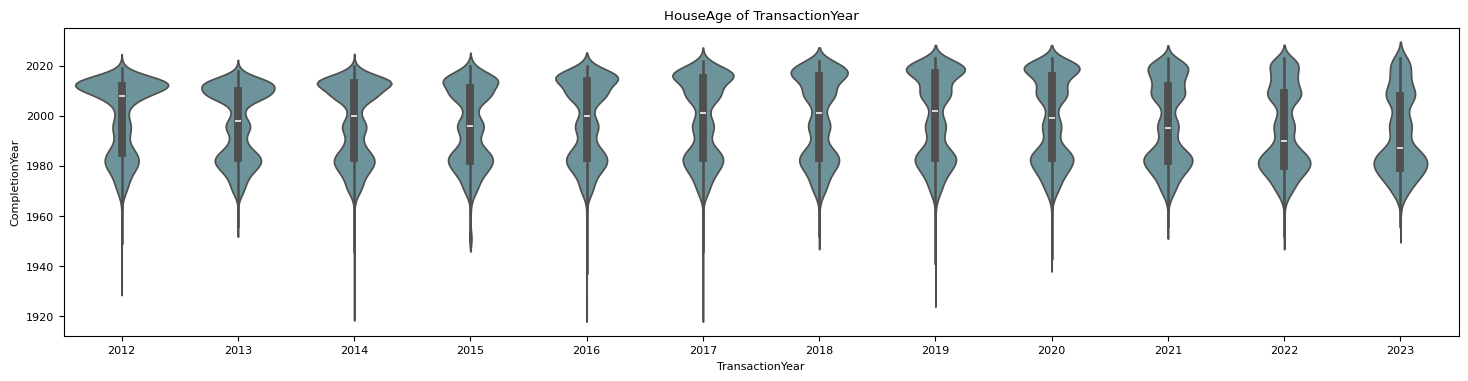

In [16]:
plt.figure(figsize=(18,4))
sns.violinplot(data=df_type,x='TransactionYear',y='CompletionYear', color='#6699A1')
plt.title('HouseAge of TransactionYear')
plt.show()

# Feature 2. Type

Missing value percentage (%): 7.7
              Missing_Count  Total_Count  Missing_Percentage
Apartment              6370       978998            0.650665
Studio                  217       156109            0.139005
Luxury_Condo            886       482481            0.183634
Condo                  1201       526978            0.227903
House                   578        58130            0.994323


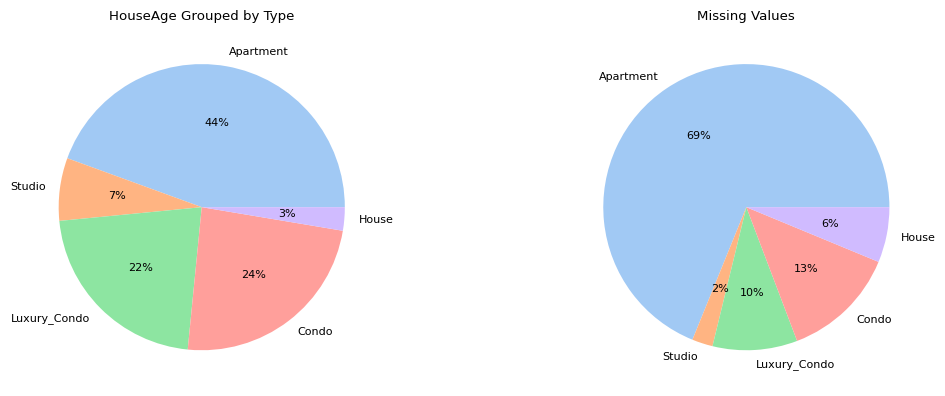

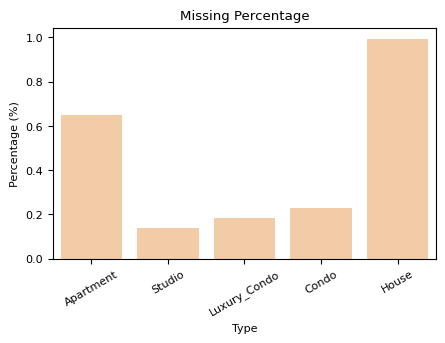

In [17]:
target_column = 'HouseAge'
gorup_column = 'Type'
data_all = pa.draw_pie_groupby(df, target_column, gorup_column, 1)

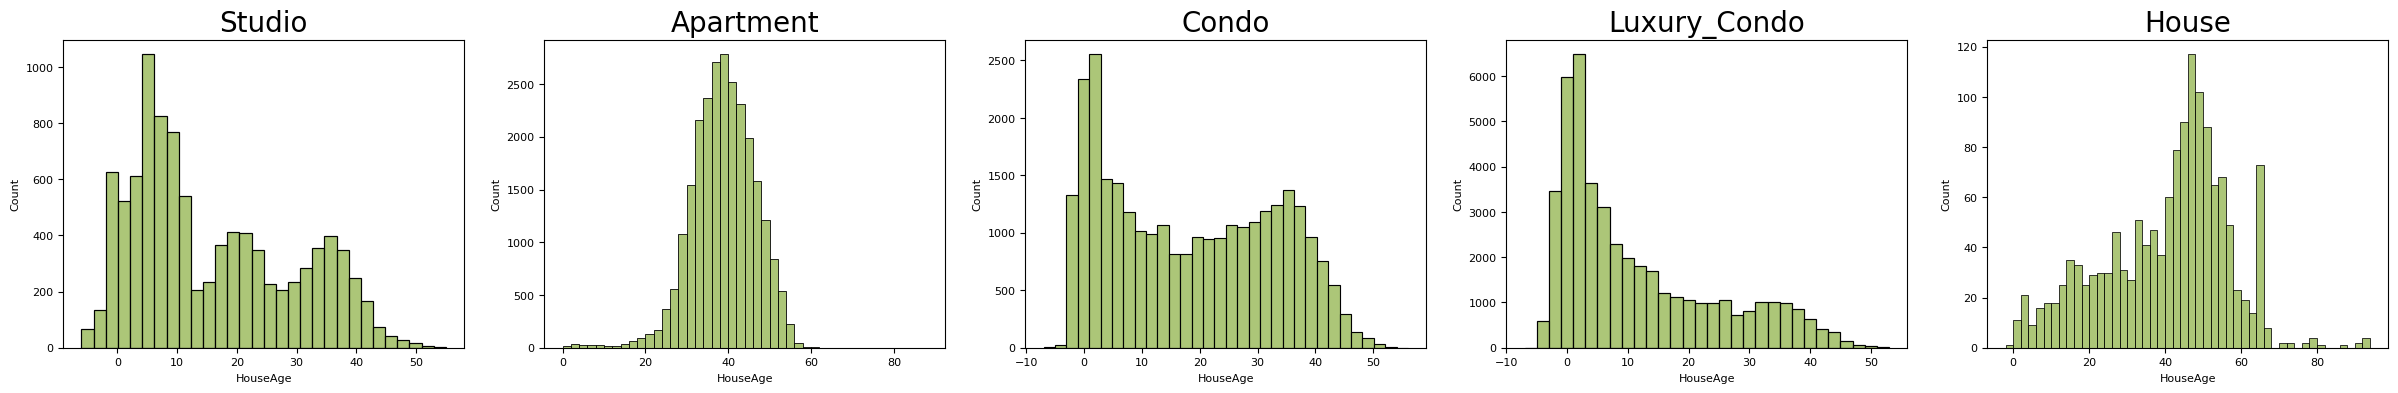

In [18]:
#查看HouseAge，在不同'Type'中的資料分布 (Histrogram)
group = df_nonull.groupby('Type')

# set the order
fig, axes = plt.subplots(1, len(group), figsize=(30,4))
order_type = {'Studio': 0, 'Apartment': 1, 'Condo': 2, 'Luxury_Condo': 3, 'House': 4}

for i, (name, group_data) in enumerate(group):
    ax = axes[order_type[name]]
    ax.set_title(name, fontsize=20)
    sns.histplot(group_data['HouseAge'], color='#90B44B', bins='auto', binwidth=2, ax=ax)
plt.show()

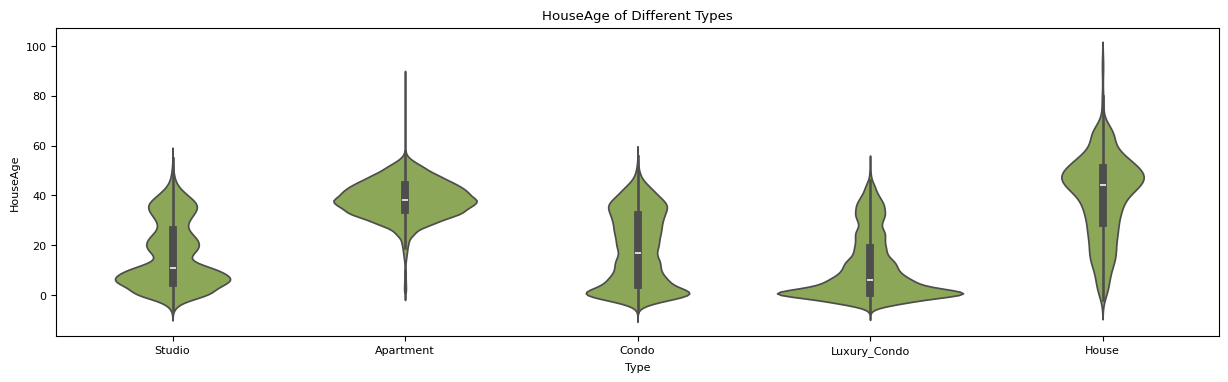

In [19]:
#查看 HouseAge，在不同 Type 中的資料分布 (Violin Plot)
plt.figure(figsize=(15,4))

# set the order
order_type = ['Studio', 'Apartment', 'Condo', 'Luxury_Condo', 'House']
#set the violinplot
sns.violinplot(data=df_type,x='Type',y='HouseAge', color='#90B44B', order=order_type)
plt.title('HouseAge of Different Types')
plt.show()

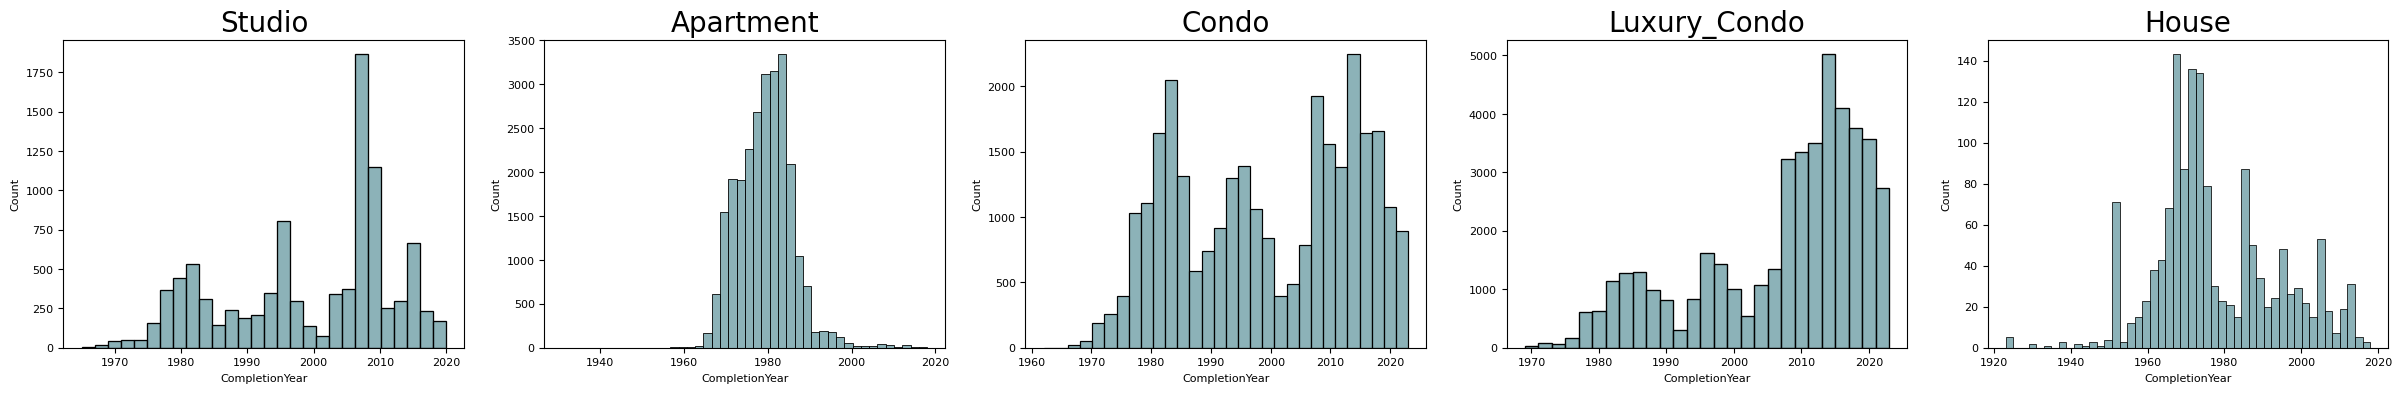

In [20]:
#查看 CompletionYear，在不同 Type 中的資料分布 (Histrogram)
group = df_nonull.groupby('Type')

fig, axes = plt.subplots(1, len(group), figsize=(30,4))
order_type = {'Studio': 0, 'Apartment': 1, 'Condo': 2, 'Luxury_Condo': 3, 'House': 4}

for i, (name, group_data) in enumerate(group):
    ax = axes[order_type[name]]
    ax.set_title(name, fontsize=20)
    sns.histplot(group_data['CompletionYear'], color='#6699A1', bins='auto', binwidth=2, ax=ax)
plt.show()

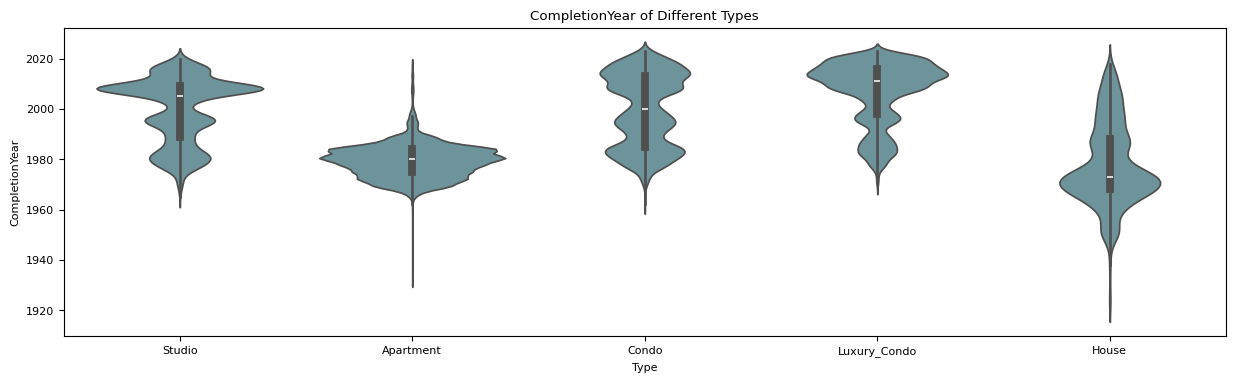

In [21]:
#查看 CompletionYear，在不同 Type 中的資料分布 (Violin Plot)
plt.figure(figsize=(15,4))

# set the order
order_type = ['Studio', 'Apartment', 'Condo', 'Luxury_Condo', 'House']
#set the violinplot
sns.violinplot(data=df_type,x='Type',y='CompletionYear', color='#6699A1', order=order_type)
plt.title('CompletionYear of Different Types')
plt.show()

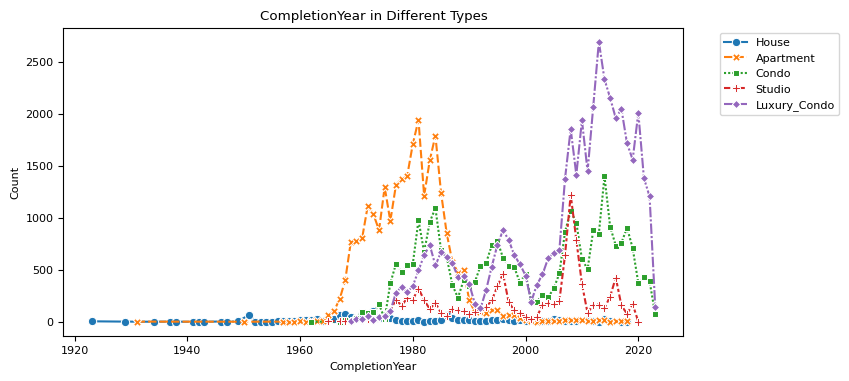

In [22]:
# Count of Different Types in Time
plt.figure(figsize=(8, 4))
data = df.groupby(['CompletionYear', 'Type']).size().reset_index(name='Count')
sns.lineplot(data=data, x='CompletionYear', y='Count', hue='Type', style='Type', markers=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('CompletionYear in Different Types')
plt.show()

# Feature 3. District

Missing value percentage (%): 7.7
            Missing_Count  Total_Count  Missing_Percentage
Wenshan              1521       192229            0.791244
Zhongshan             411       329969            0.124557
Da_an                2254       198201            1.137229
Neihu                 190       275841            0.068880
Nangang               878        57201            1.534938
Beitou                  4       259569            0.001541
Datong                365        66119            0.552035
Wanhua                570       134596            0.423490
Shilin                101       261795            0.038580
Songshan              904       172503            0.524049
Xinyi                1451       163615            0.886838
Zhongzheng            603        91058            0.662215


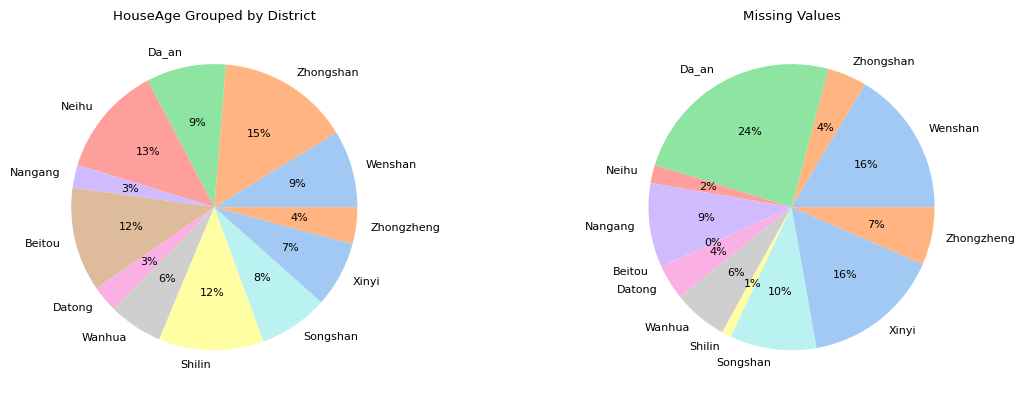

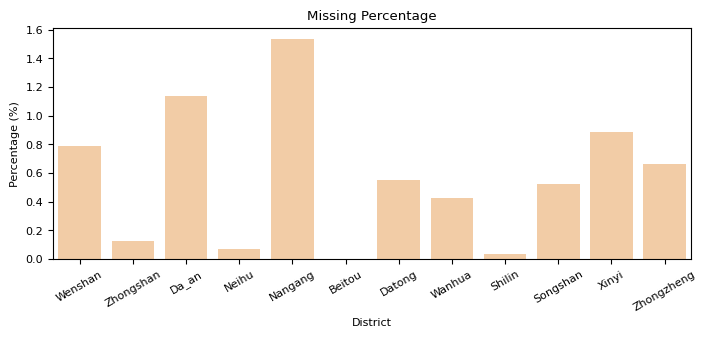

In [23]:
target_column = 'HouseAge'
gorup_column = 'District'
data_all = pa.draw_pie_groupby(df, target_column, gorup_column, 1)

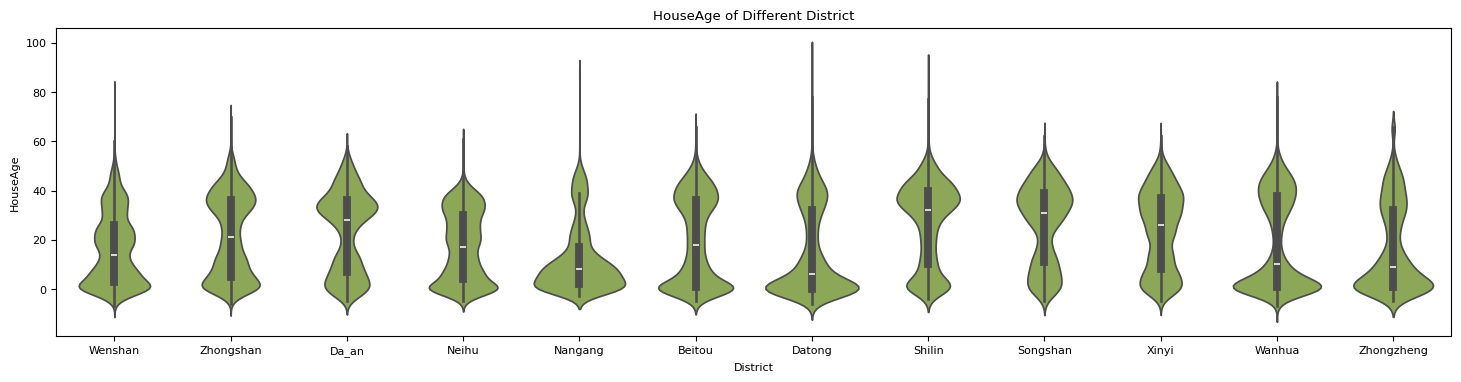

In [24]:
plt.figure(figsize=(18,4))
sns.violinplot(data=df_type,x='District',y='HouseAge', color='#90B44B')
plt.title('HouseAge of Different District')
plt.show()

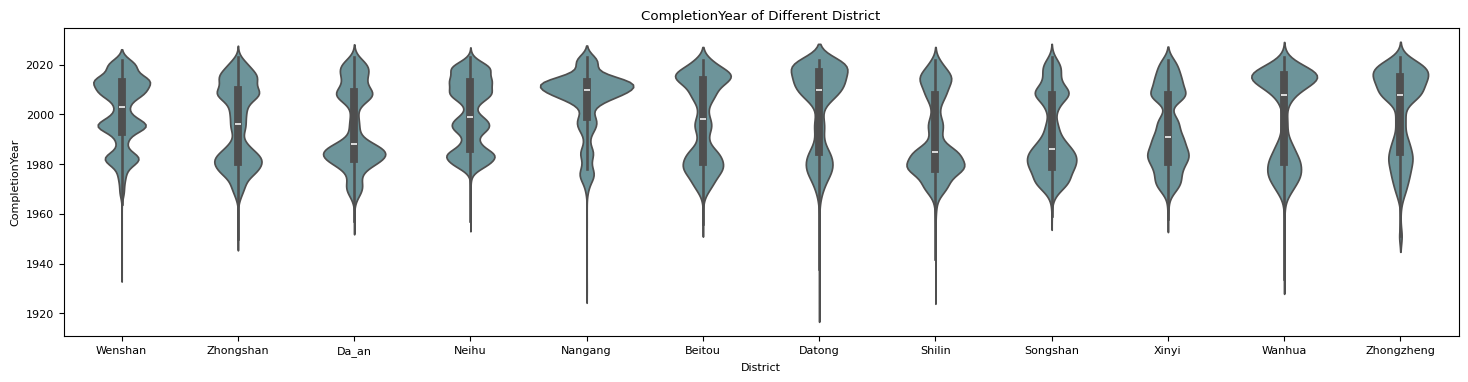

In [25]:
plt.figure(figsize=(18,4))
sns.violinplot(data=df_type,x='District',y='CompletionYear', color='#6699A1')
plt.title('CompletionYear of Different District')
plt.show()

# Feature 4. District x Type

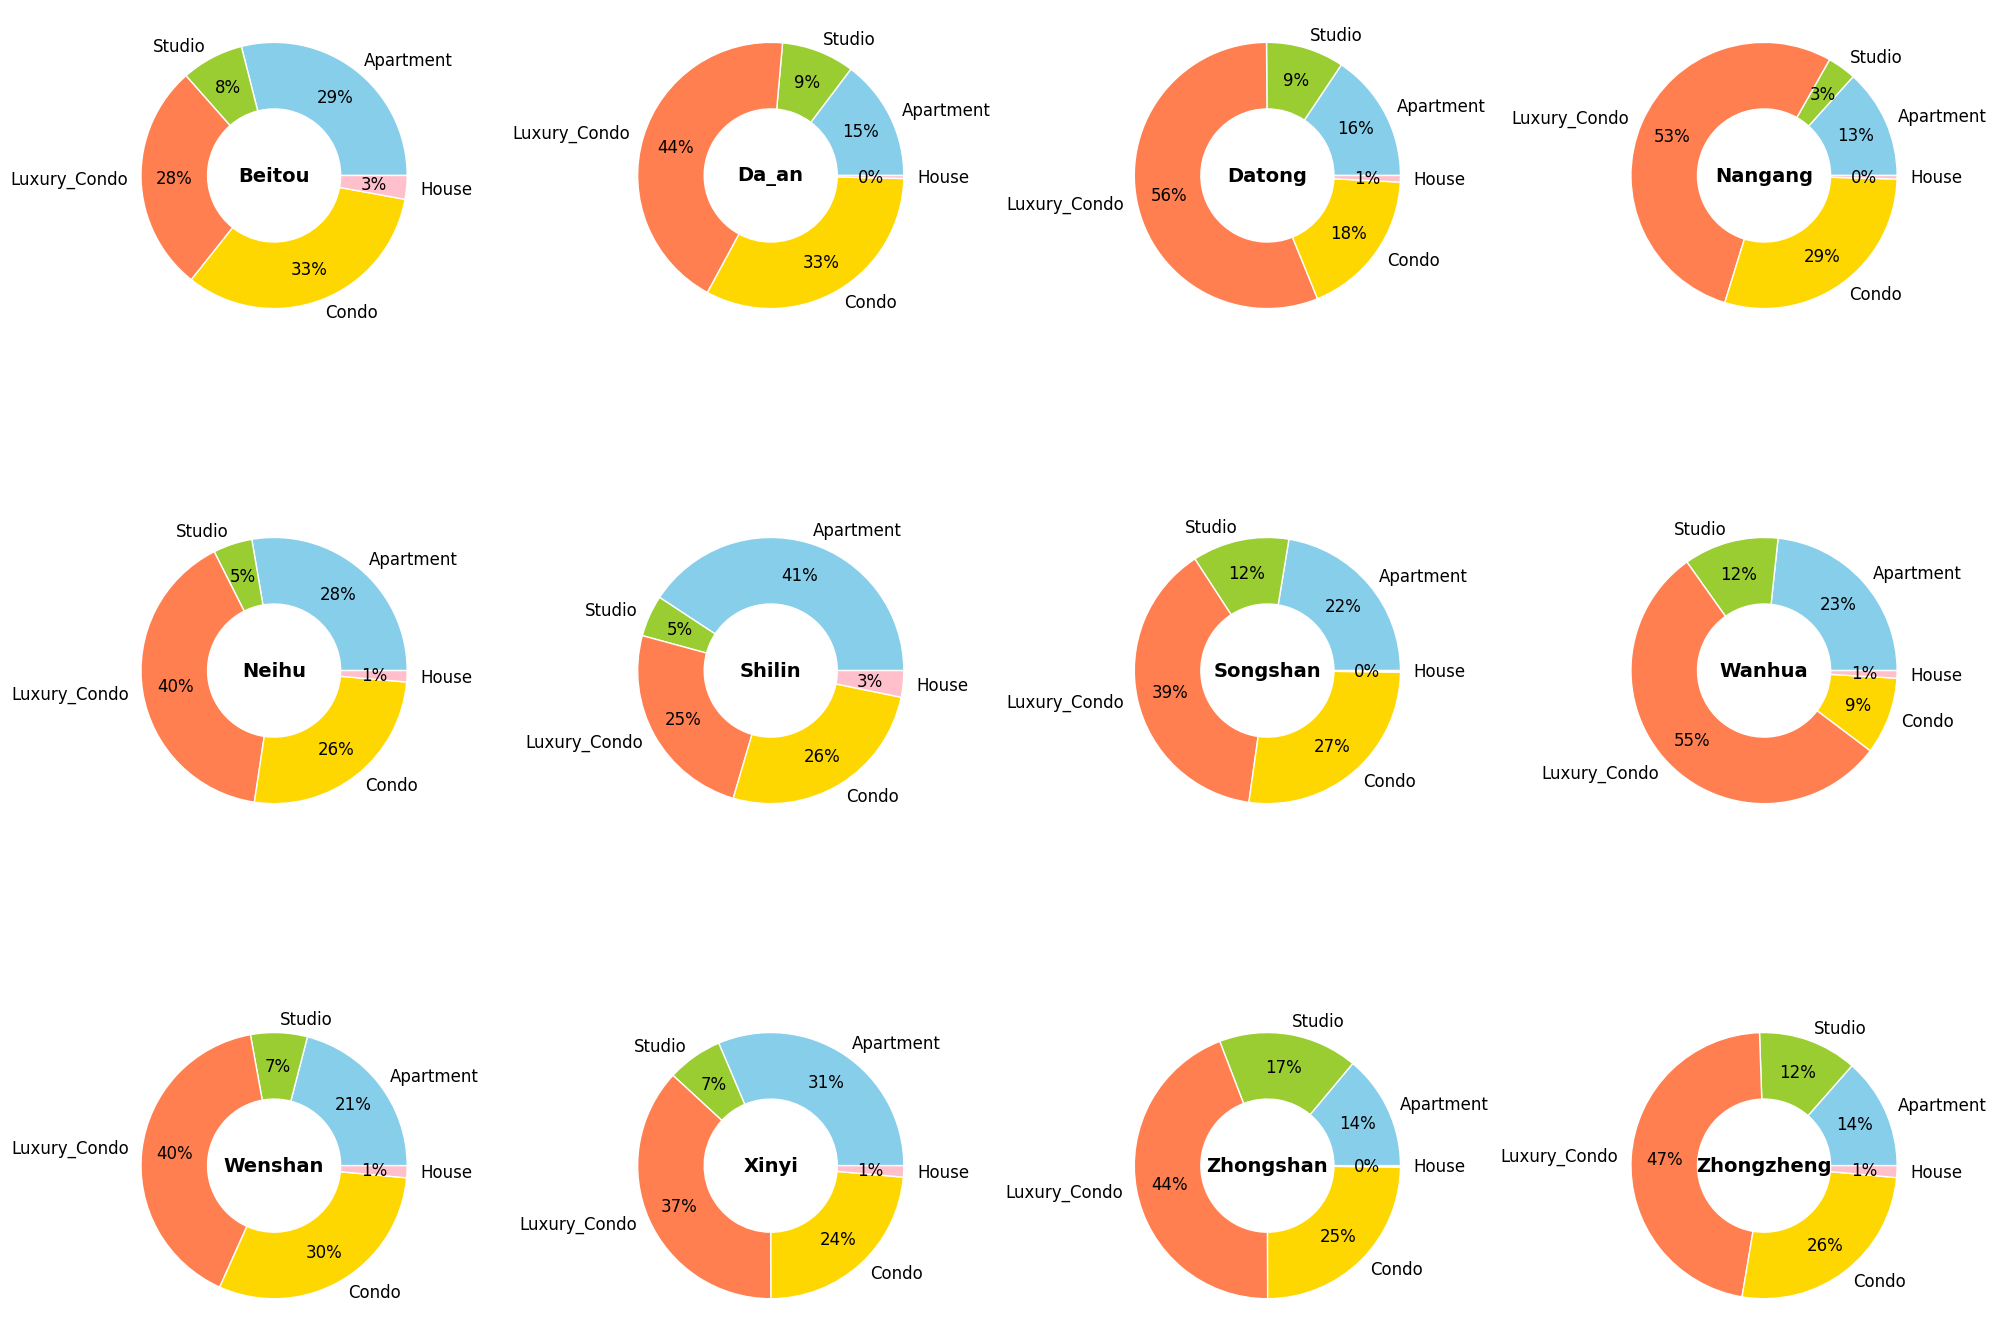

In [26]:
# 查看Type，在不同'District'中的資料分布
group = df_nonull.groupby('District')
colors = ['skyblue', 'yellowgreen', 'coral', 'gold', 'pink'] 
type_list = df_nonull['Type'].unique()

num_districts = len(group)
num_cols = 4  # ste the columns
num_rows = num_districts // num_cols + (num_districts % num_cols > 0)  # calculate rows

plt.figure(figsize=(20, num_rows * 5)) 

for i, (name, group_data) in enumerate(group):
    plt.subplot(num_rows, num_cols, i + 1)
    dict = {}  # save the number of types for each ditricts
    
    # count the number of each type
    for type_name in type_list:
        count = group_data[group_data['Type'] == type_name].shape[0] 
        dict[type_name] = count

    data_values = dict.values()
    labels_values = dict.keys()

    # pie plt
    plt.pie(data_values, labels=labels_values, colors=colors, autopct='%.0f%%', radius=1, pctdistance=0.75, wedgeprops={'width': 0.5, 'edgecolor': 'w'}, textprops={'fontsize': 12})
    plt.text(0, 0, name, horizontalalignment='center', verticalalignment='center', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


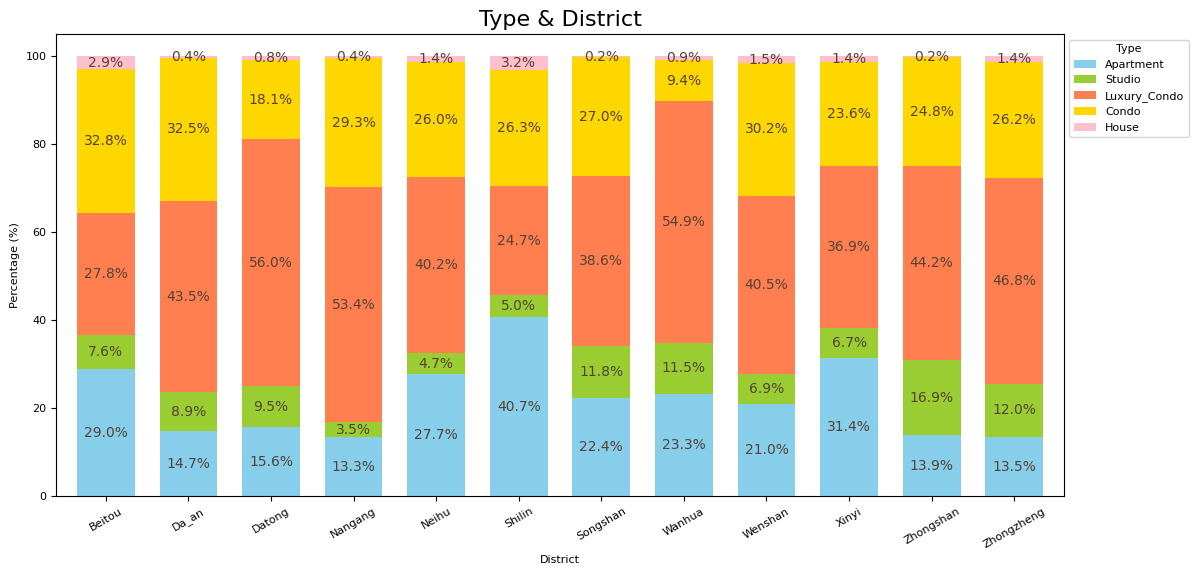

In [27]:
# 查看Type，在不同'District'中的資料分布百分比
group = df_nonull.groupby('District')

dict_group_len = {}
dict_type = {}
for name_dist, group_data in group:
    dict_group_len[name_dist] = len(group_data)

type_names = df_nonull['Type'].unique()
for type_name in type_names:
    percentages = []
    dist_names = []
    for name_dist, group_data in group:
        count = group_data[group_data['Type'] == type_name].shape[0]
        percentage = count / dict_group_len[name_dist] * 100
        dist_names.append(name_dist)
        percentages.append(percentage)
    dict_type[type_name] = percentages

#create DataFrame
data = pd.DataFrame(dict_type)
data['District'] = dist_names

#create stacked bar chart
colors = ['skyblue', 'yellowgreen', 'coral', 'gold', 'pink'] 
data.set_index('District').plot(kind='bar', stacked=True, color=colors, figsize=(13, 6), width=0.7)

#add overall title
plt.title('Type & District', fontsize=16)

#add axis titles
plt.xlabel('District')
plt.ylabel('Percentage (%)')

#rotate x-axis labels
plt.xticks(rotation=30)

# add the annotations
for idx, p in enumerate(plt.gca().patches):
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    plt.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=10,color='#554236')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Type')
plt.show()


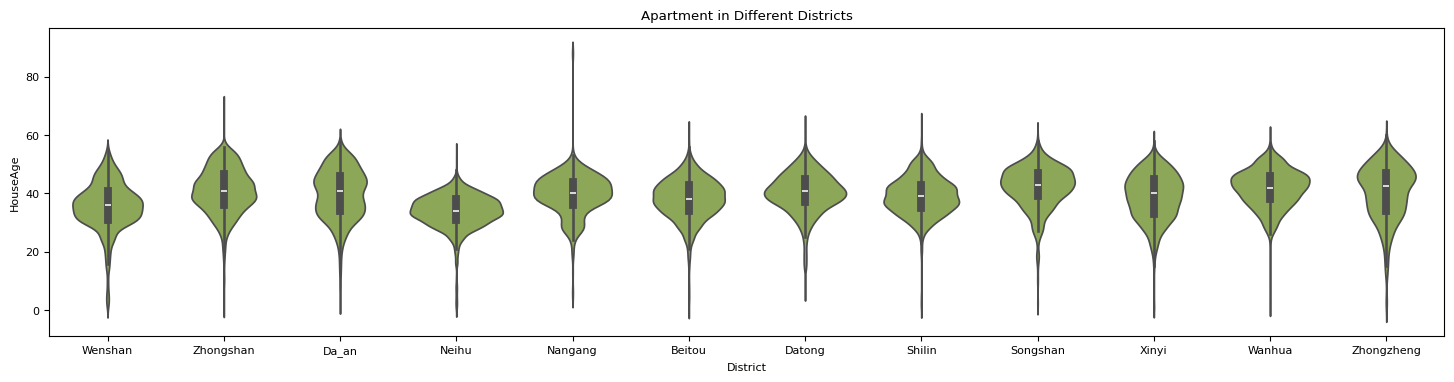

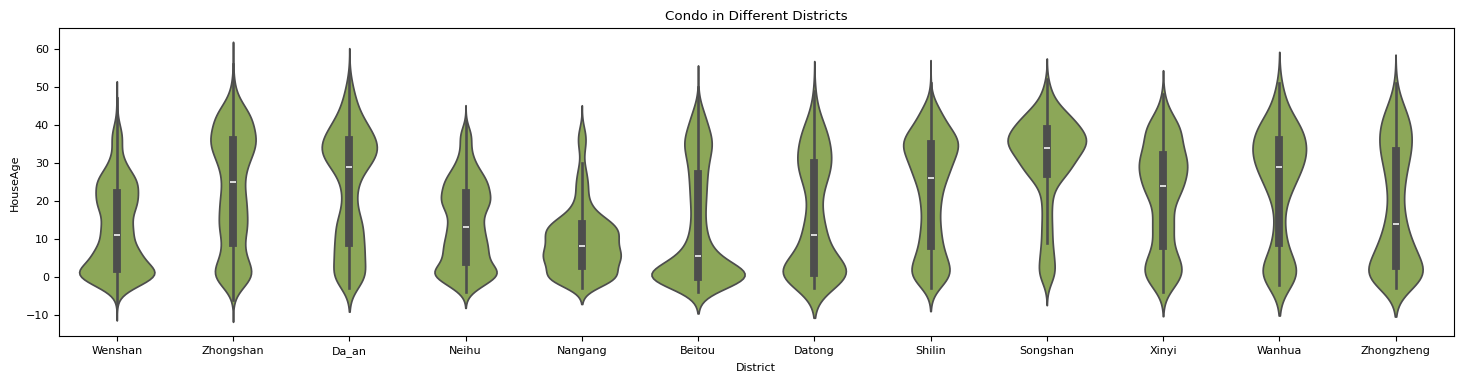

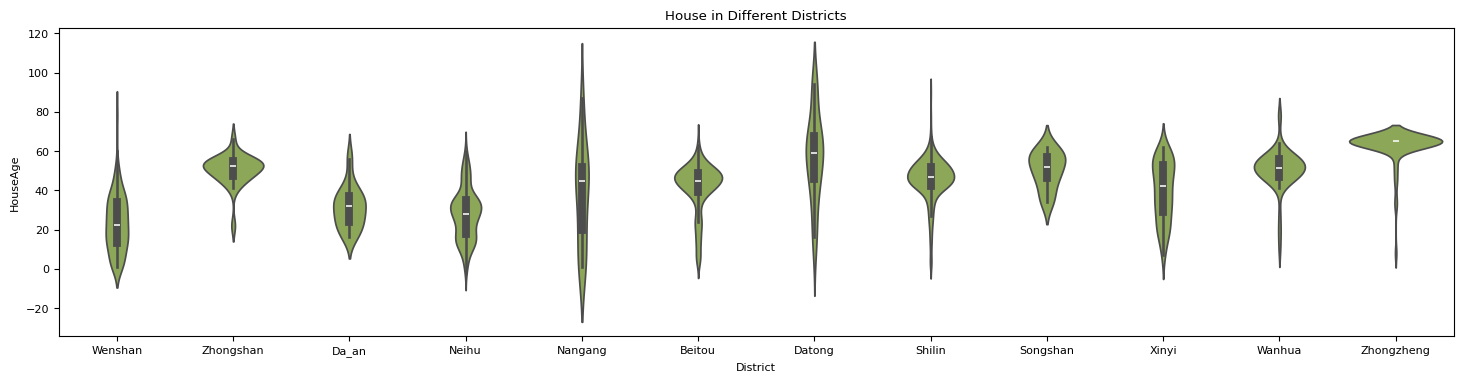

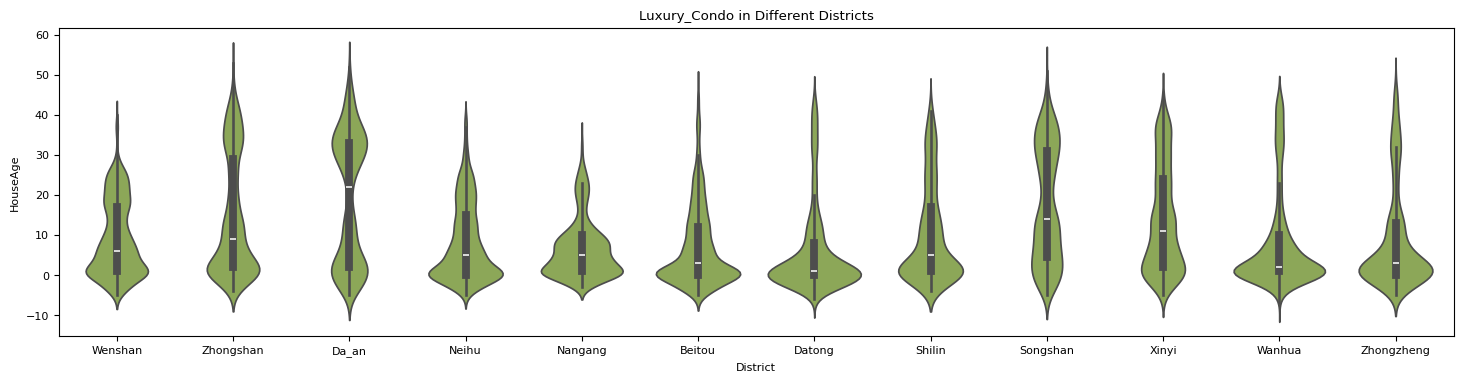

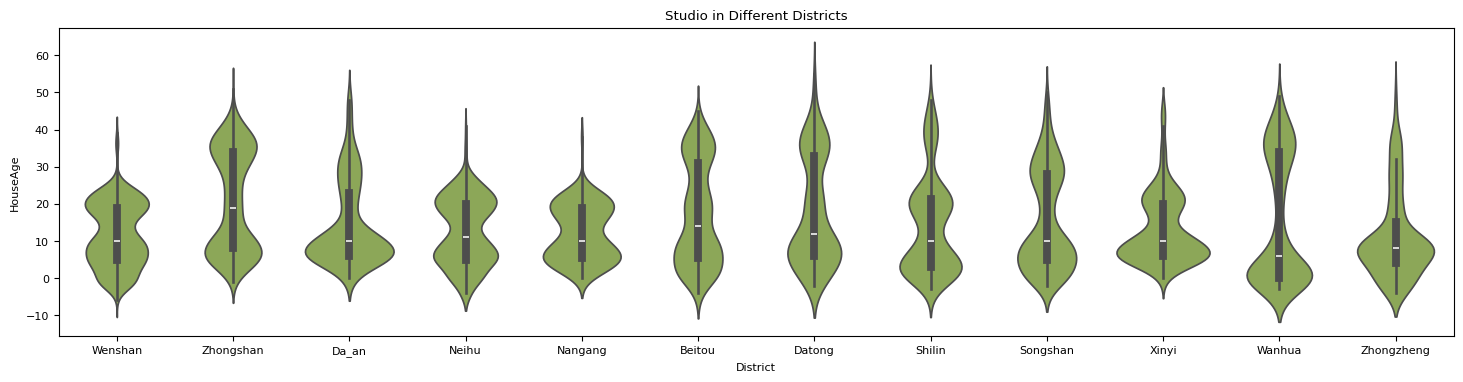

In [28]:
df_type = df_nonull.copy()

# 只存取數值欄位
df_type = df_type.select_dtypes(include = ['float64', 'int64'])
df_type['District'] = df_nonull['District']
df_type['Type'] = df_nonull['Type']

type_order = df_type['District'].unique()
group = df_type.groupby('Type')

for name, group_data in group:    
    plt.figure(figsize=(18,4))
    sns.violinplot(data=group_data,x='District',y='HouseAge', color='#90B44B', order=type_order)
    plt.title(f"{name} in Different Districts")
    plt.show()

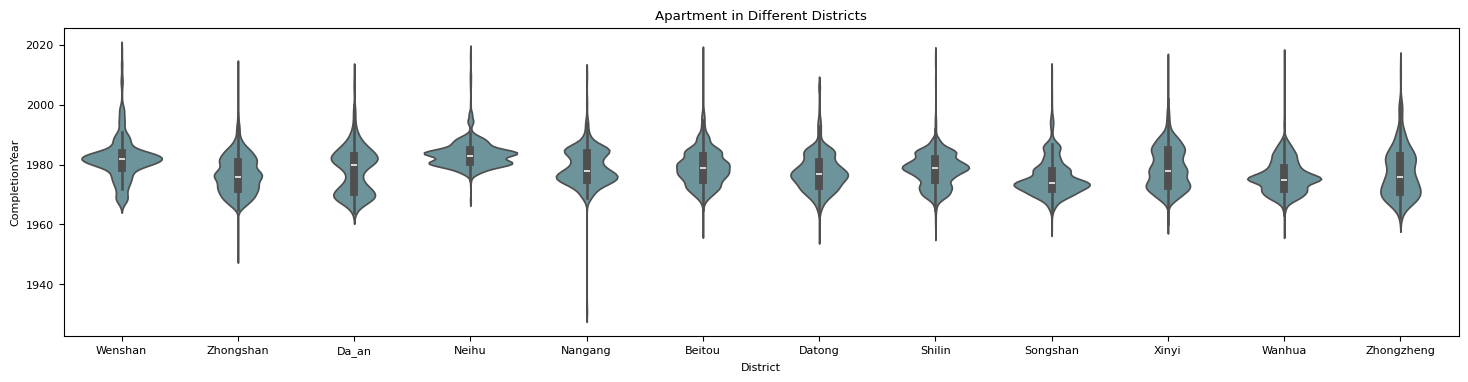

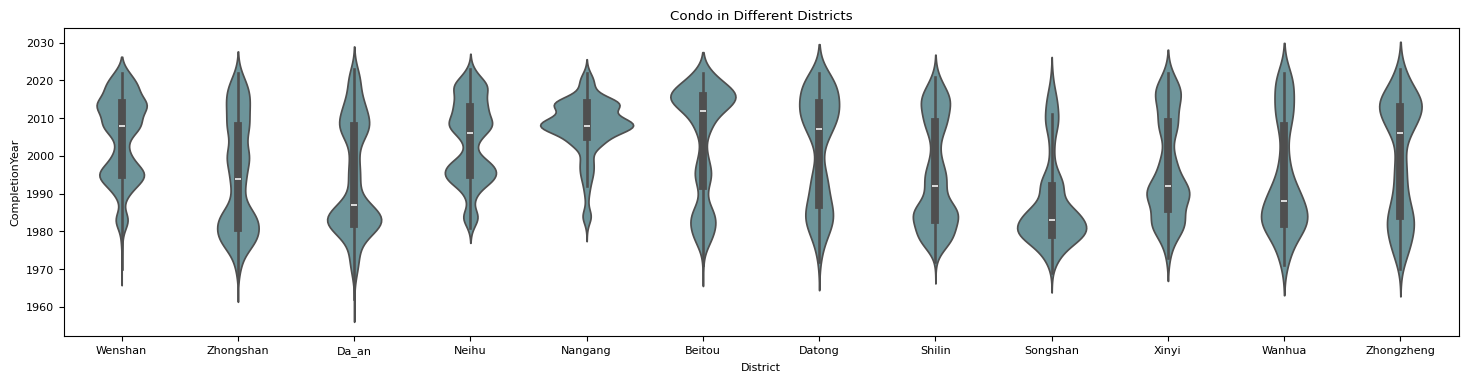

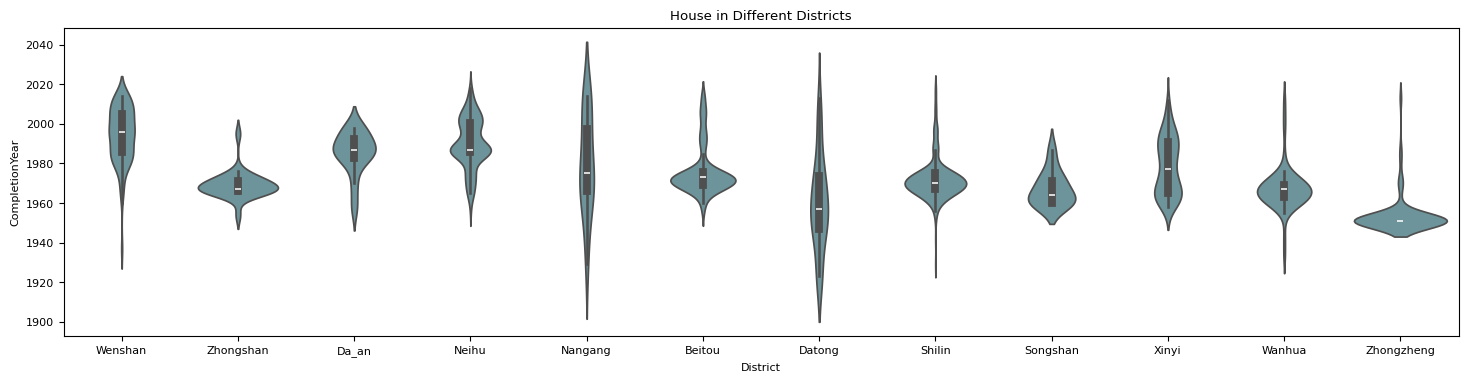

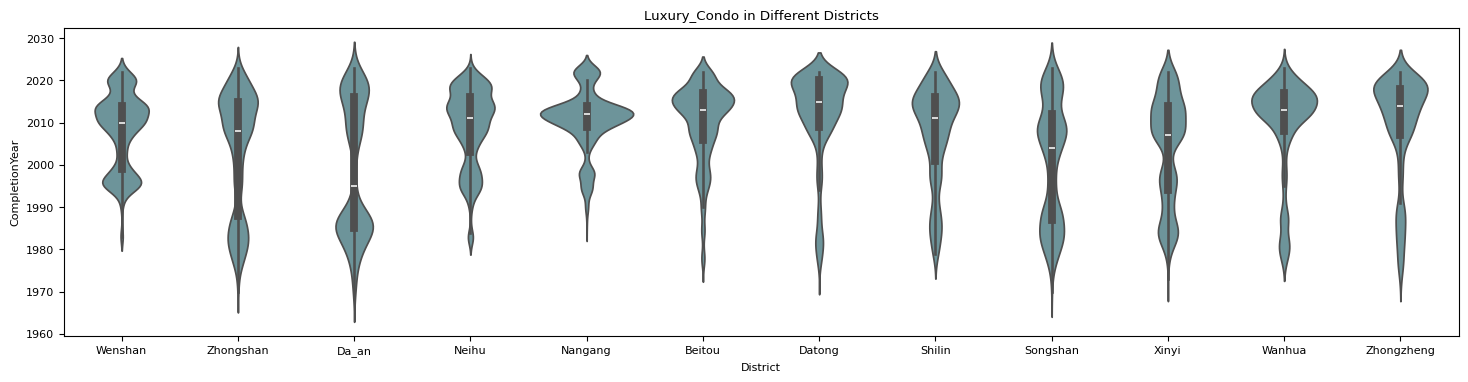

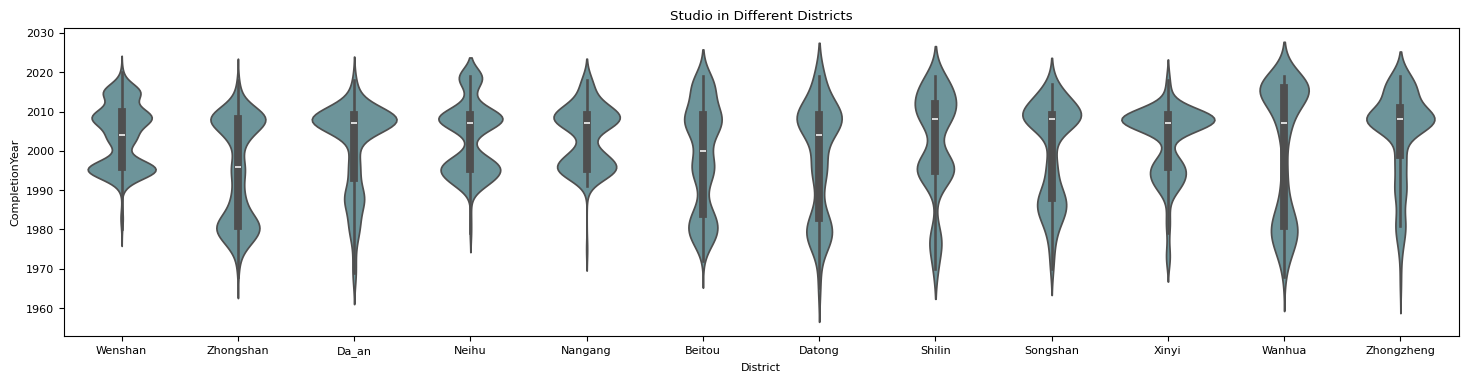

In [29]:
df_type = df_nonull.copy()

# 只存取數值欄位
df_type = df_type.select_dtypes(include = ['float64', 'int64'])
df_type['District'] = df_nonull['District']
df_type['Type'] = df_nonull['Type']

type_order = df_type['District'].unique()
group = df_type.groupby('Type')

for name, group_data in group:    
    plt.figure(figsize=(18,4))
    sns.violinplot(data=group_data,x='District',y='CompletionYear', color='#6699A1', order=type_order)
    plt.title(f"{name} in Different Districts")
    plt.show()

# 6-2. 用眾數補值 CompletionYear
CompletionYear補值，分類(District * Type)取眾數

In [30]:
#查看不同 Type x District 中，CompletionYear 的統計資料
group_storeys = df_nonull[['Identifier', 'Type', 'District', 'HouseAge', 'CompletionYear', 'TransactionYear']]
group = group_storeys.groupby('Type')
stats_df = pa.statistics_houseage(group, 'District', 'CompletionYear')
stats_df

,District,Type,Count,Mean,Std,Min,Max,Mode
0,Beitou,Apartment,3811,1979.330359,6.267507,1958,2017,1981
1,Da_an,Apartment,1253,1978.102155,7.849469,1964,2010,1981
2,Datong,Apartment,707,1977.599717,6.263989,1957,2006,1981
3,Nangang,Apartment,624,1979.248397,6.382975,1931,2010,1981
4,Neihu,Apartment,4425,1983.581469,4.719934,1968,2018,1981
5,Shilin,Apartment,4014,1978.406577,5.750014,1957,2017,1981
6,Songshan,Apartment,1467,1975.766871,6.055691,1959,2011,1981
7,Wanhua,Apartment,1678,1976.138856,5.465163,1958,2016,1981
8,Wenshan,Apartment,2499,1981.996399,7.238612,1967,2018,1981
9,Xinyi,Apartment,2156,1978.979592,6.993172,1960,2014,1981


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119440 entries, 0 to 119439
Data columns (total 45 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   AuxiliaryArea       119440 non-null  float64
 1   BalconyArea         119440 non-null  float64
 2   Basement            119440 non-null  bool   
 3   Bathrooms           119440 non-null  int64  
 4   Bedrooms            119440 non-null  int64  
 5   CompletionDate_AD   110188 non-null  float64
 6   CompletionYear      110188 non-null  float64
 7   District            119440 non-null  object 
 8   Elevator            119440 non-null  bool   
 9   Floor_Arabic        119440 non-null  float64
 10  Hospital_Dist       119440 non-null  float64
 11  HouseAge            110188 non-null  float64
 12  Identifier          119440 non-null  object 
 13  LandArea            119440 non-null  float64
 14  Latitude            119440 non-null  float64
 15  LivingRooms         119440 non-nul

In [32]:
# CompletionYear 使用眾數補值，分60類
#df = hr.district_english(df, 'tpe')
count = 0  
for index, row in df.iterrows():
    if pd.isna(row['CompletionYear']):
        for stats_i, stats_row in stats_df.iterrows():
            if str(stats_row['District']) == str(row['District']) and stats_row['Type'] == row['Type']:
                year = stats_row['Mode']
        df.loc[index, 'CompletionYear'] = year
        count += 1
print(f"Filled {count} missing values in 'CompletionYear' column.")

Filled 9252 missing values in 'CompletionYear' column.


In [33]:
# 比較補值前後的統計差異
print('statistics before')
df_nonull_all = df_nonull.copy()
df_nonull_all['Type'] = 'All'
df_before = pd.concat([df_nonull_all, df_nonull])
group_before = df_before.groupby('Type')
stats_before = pa.statistics_dataframe(group_before, 'CompletionYear')
print(stats_before)

print('--------------------------------------------------------------')
print('statistics after')
df_all = df.copy()
df_all['Type'] = 'All'
df_after = pd.concat([df_all, df])
group_after = df_after.groupby('Type')
stats_after = pa.statistics_dataframe(group_after, 'CompletionYear')
print(stats_after)

statistics before
           Type   Count         Mean        Std   Min   Max  Mode
0           All  110188  1997.448043  16.182181  1923  2023  2008
1     Apartment   25526  1979.366058   6.707294  1931  2018  1981
2         Condo   28965  1999.423408  14.337269  1962  2023  2014
3         House    1454  1977.652682  16.419685  1923  2018  1973
4  Luxury_Condo   44493  2006.696806  12.420156  1969  2023  2013
5        Studio    9750  1999.665641  12.867457  1965  2020  2008
--------------------------------------------------------------
statistics after
           Type   Count         Mean        Std   Min   Max  Mode
0           All  119440  1996.753491  16.222465  1923  2023  1981
1     Apartment   31896  1979.692375   6.035698  1931  2018  1981
2         Condo   30166  2000.003746  14.335131  1962  2023  2014
3         House    2032  1976.329232  14.045904  1923  2018  1973
4  Luxury_Condo   45379  2006.819873  12.329191  1969  2023  2013
5        Studio    9967  1999.847095  12.784

119440


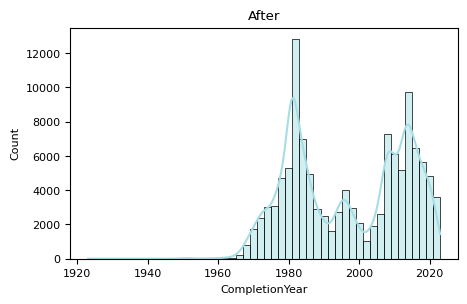

In [34]:
#補值後屋齡直方圖
print(len(df['CompletionYear']))
plt.figure(figsize=(5, 3))
plt.title('After')
sns.histplot(df['CompletionYear'], color='#A5DEE4', bins=50, kde=True)
plt.show()

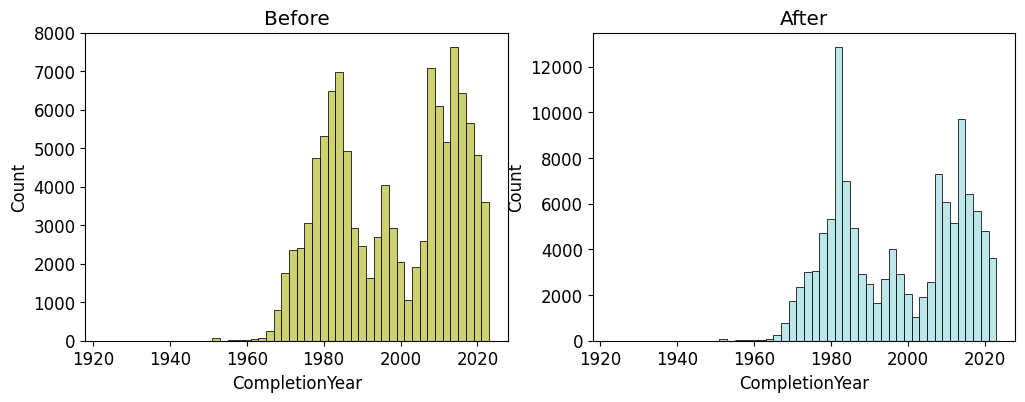

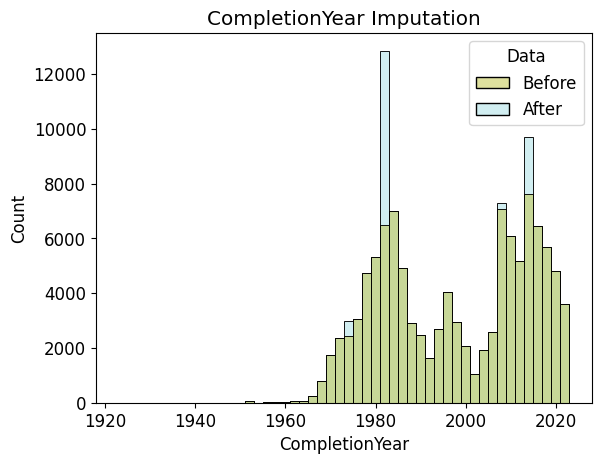

In [35]:
df_before = df_nonull.copy()
df_before['Data'] = 'Before'
df_after = df.copy()
df_after['Data'] = 'After'
frames = [df_before, df_after]
df_merge = pd.concat(frames)
#print(df_merge['Data'])

#補值前後'HouseAge'疊圖
fig = plt.figure(figsize=(12,4))
plt.rcParams['font.size'] = 12
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title('Before')
sns.histplot(df_nonull['CompletionYear'], color='#BEC23F',bins=50, ax=ax1)

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title('After')
sns.histplot(df['CompletionYear'], color='#A5DEE4', bins=50, ax=ax2)
plt.show()

#plt.figure(figsize=(5, 7))
sns.histplot(df_merge, x = 'CompletionYear', hue="Data", multiple="layer", palette={'Before': '#BEC23F', 'After': '#A5DEE4'}, bins=50)
plt.title('CompletionYear Imputation')
#plt.xticks(np.arange(32, 198, 12))
#plt.tight_layout()
plt.show()

In [36]:
df.to_csv('CompletionYear.csv', encoding='utf-8-sig', index=False)

# 6-3. 用 'CompletionYear' 補值 'HouseAge'

In [37]:
# 補值 HouseAge
count = 0
for index, row in df.iterrows():
    if pd.isna(row['HouseAge']):
        age = int(row['TransactionYear']) - int(row['CompletionYear'])
        df.loc[index, 'HouseAge'] = int(age)
        count += 1        
print(f"Filled {count} missing values in 'HouseAge' column.")

Filled 9252 missing values in 'HouseAge' column.


In [38]:
# 比較 HouseAge 補值前後的統計差異
print('statistics before')
df_nonull_all = df_nonull.copy()
df_nonull_all['Type'] = 'All'
df_before = pd.concat([df_nonull_all, df_nonull])
group_before = df_before.groupby('Type')
stats_before = pa.statistics_dataframe(group_before, 'HouseAge')
print(stats_before)

print('--------------------------------------------------------------')
print('statistics after')
df_all = df.copy()
df_all['Type'] = 'All'
df_after = pd.concat([df_all, df])
group_after = df_after.groupby('Type')
stats_after = pa.statistics_dataframe(group_after, 'HouseAge')
print(stats_after)

statistics before
           Type   Count       Mean        Std  Min  Max  Mode
0           All  110188  19.990344  16.588874   -7   94     0
1     Apartment   25526  38.352973   7.635660    0   88    38
2         Condo   28965  18.193613  14.720437   -7   56     0
3         House    1454  39.979367  16.537125   -2   94    65
4  Luxury_Condo   44493  10.843975  12.837681   -7   53     0
5        Studio    9750  16.011179  13.088633   -6   55     0
--------------------------------------------------------------
statistics after
           Type   Count       Mean        Std  Min  Max  Mode
0           All  119440  20.637182  16.600143   -7   94     0
1     Apartment   31896  37.843962   7.025848    0   88    38
2         Condo   30166  17.578897  14.747290   -7   56     0
3         House    2032  41.302165  14.218809   -2   94    47
4  Luxury_Condo   45379  10.704797  12.755525   -7   53     0
5        Studio    9967  15.837263  13.002123   -6   55     0


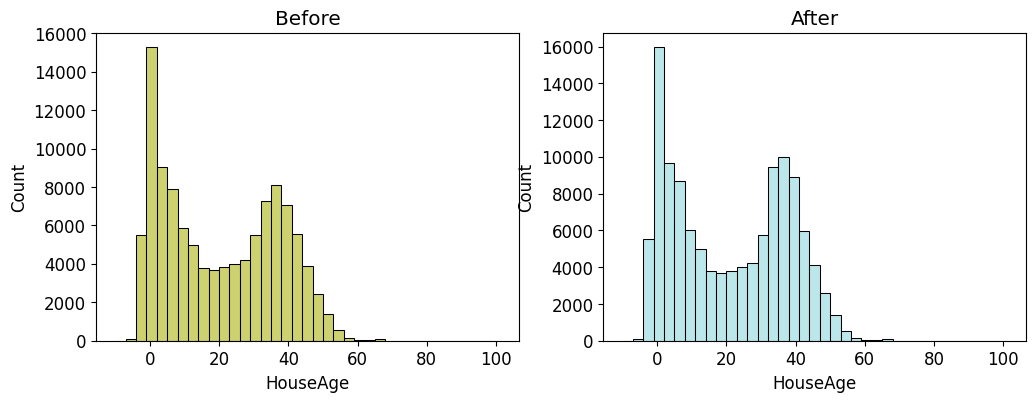

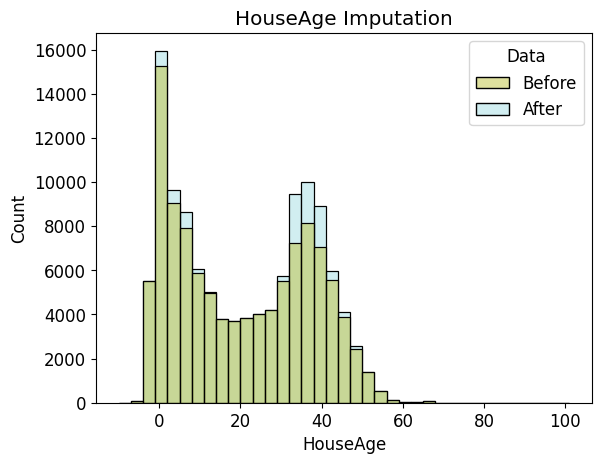

In [39]:
# 疊圖比較補值前後 HouseAge 資料分布情況
df_before = df_nonull.copy()
df_before['Data'] = 'Before'
df_after = df.copy()
df_after['Data'] = 'After'
frames = [df_before, df_after]
df_merge = pd.concat(frames)
#print(df_merge['Data'])

#補值前
fig = plt.figure(figsize=(12,4))
plt.rcParams['font.size'] = 12
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title('Before')
sns.histplot(df_nonull['HouseAge'], color='#BEC23F',bins=range(-10,103,3), ax=ax1)
#補值後
ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title('After')
sns.histplot(df['HouseAge'], color='#A5DEE4', bins=range(-10,103,3), ax=ax2)
plt.show()
#疊圖
#plt.figure(figsize=(5, 7))
sns.histplot(df_merge, x = 'HouseAge', hue="Data", multiple="layer", palette={'Before': '#BEC23F', 'After': '#A5DEE4'}, bins=range(-10,103,3))
plt.title('HouseAge Imputation')
#plt.xticks(np.arange(32, 198, 12))
#plt.tight_layout()
plt.show()

In [40]:
# HouseAge/ CompletionYear 資料型態轉為 int64
df['CompletionYear'] = df['CompletionYear'].astype('int64')
df['HouseAge'] = df['HouseAge'].astype('int64')

In [41]:
# 檢查 HouseAge/ CompletionYear缺失植數量
missing_values = df.isna().sum()
print('HouseAge 空值: {}, {}'.format(missing_values['HouseAge'], df['HouseAge'].dtypes))
print('CompletionYear 空值: {}, {}'.format(missing_values['CompletionYear'], df['CompletionYear'].dtypes))

HouseAge 空值: 0, int64
CompletionYear 空值: 0, int64


In [42]:
df.to_csv('6_missingvalue_houseage.csv', encoding='utf-8-sig', index=False)

# 缺失值 matrix

In [43]:
df = pd.read_csv('6_missingvalue_houseage.csv', low_memory=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119440 entries, 0 to 119439
Data columns (total 45 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   AuxiliaryArea       119440 non-null  float64
 1   BalconyArea         119440 non-null  float64
 2   Basement            119440 non-null  bool   
 3   Bathrooms           119440 non-null  int64  
 4   Bedrooms            119440 non-null  int64  
 5   CompletionDate_AD   110188 non-null  float64
 6   CompletionYear      119440 non-null  int64  
 7   District            119440 non-null  object 
 8   Elevator            119440 non-null  bool   
 9   Floor_Arabic        119440 non-null  float64
 10  Hospital_Dist       119440 non-null  float64
 11  HouseAge            119440 non-null  int64  
 12  Identifier          119440 non-null  object 
 13  LandArea            119440 non-null  float64
 14  Latitude            119440 non-null  float64
 15  LivingRooms         119440 non-nul

In [44]:
# 刪除 CompletionDate_AD
df.drop(['CompletionDate_AD'], axis=1, inplace=True)

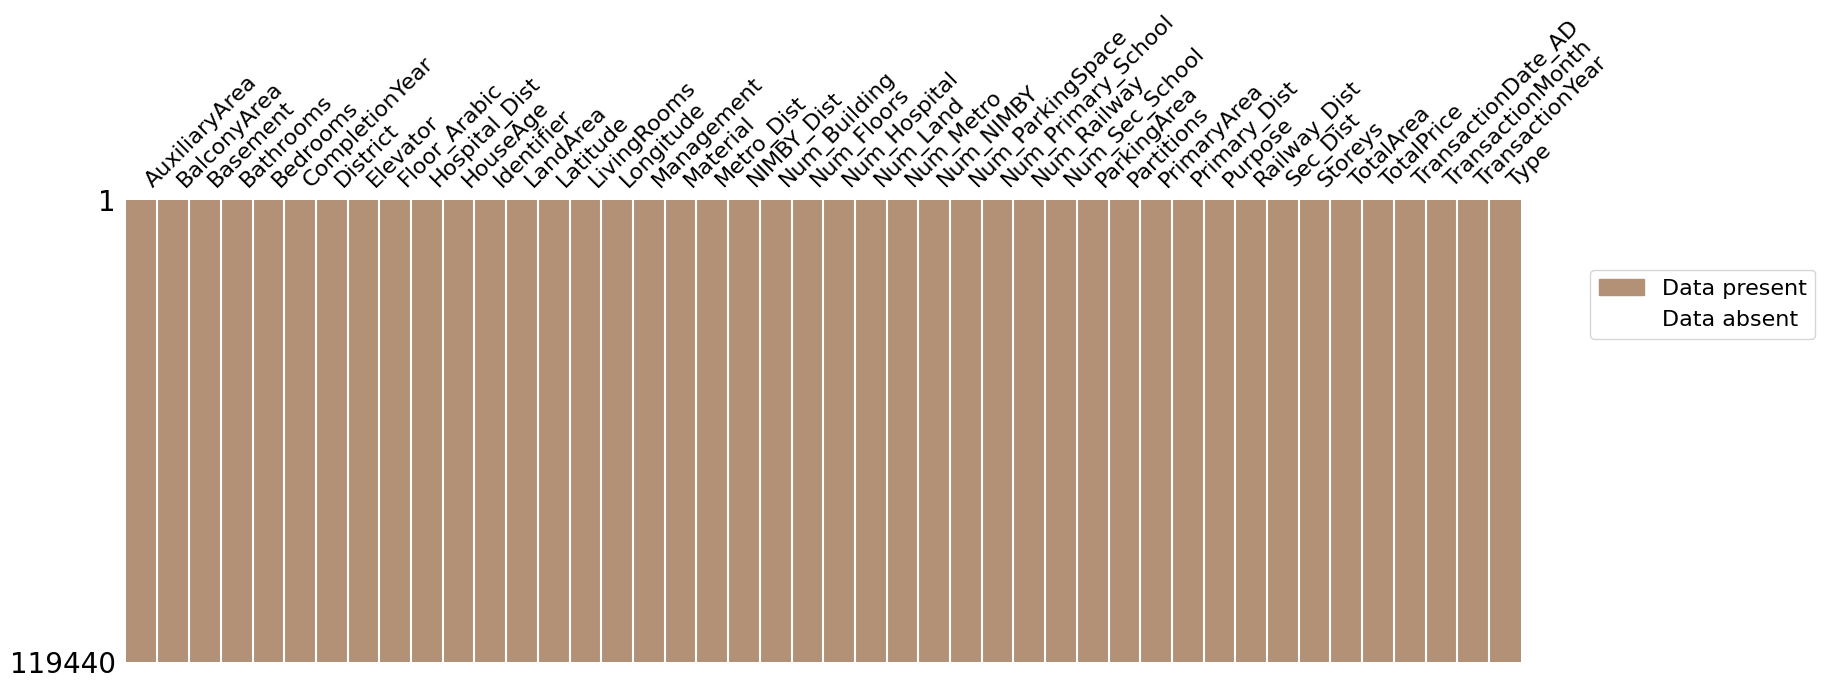

In [45]:
#缺失值矩陣事件圖
msno.matrix(df, sparkline=False, figsize=(18,6), fontsize=16, color=(0.7, 0.57, 0.47));
gray_patch = mpatches.Patch(color='#B29177', label='Data present')
white_patch = mpatches.Patch(color='white', label='Data absent')
plt.legend(loc=[1.05,0.7], handles=[gray_patch, white_patch], fontsize=16)
plt.show()

In [46]:
#各欄位缺失植數量
missing_values = df.isna().sum()
#print(missing_values)
missing_value_true = missing_values[missing_values > 1]
print(missing_value_true)
print(len(df))

Series([], dtype: int64)
119440
